# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = mouse_metadata.merge(study_results, how="outer", left_on='Mouse ID', right_on='Mouse ID')

# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice. 249
mouse_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.  array(['g989'], dtype=object)
# https://saturncloud.io/blog/find-rows-in-dataframe-that-have-duplicate-values-in-two-columns/#:~:text=To%20find%20duplicate%20rows%20based,Boolean%20Series%20denoting%20duplicate%20rows.&text=The%20subset%20parameter%20allows%20us,want%20to%20check%20for%20duplicates.
duplicates = mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_rows = mouse_df[duplicates]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_df.drop(mouse_df[mouse_df['Mouse ID'] == 'g989'].index)
mouse_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped = mouse_df.groupby('Drug Regimen')
summary_df = pd.DataFrame()
grouped['Tumor Volume (mm3)'].mean()
summary_df['mean'] = grouped['Tumor Volume (mm3)'].mean()
summary_df['median'] = grouped['Tumor Volume (mm3)'].median()
summary_df['variance'] = grouped['Tumor Volume (mm3)'].var()
summary_df['std'] = grouped['Tumor Volume (mm3)'].std()
summary_df['sem'] = grouped['Tumor Volume (mm3)'].sem()
summary_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
#grouped.count().head()

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

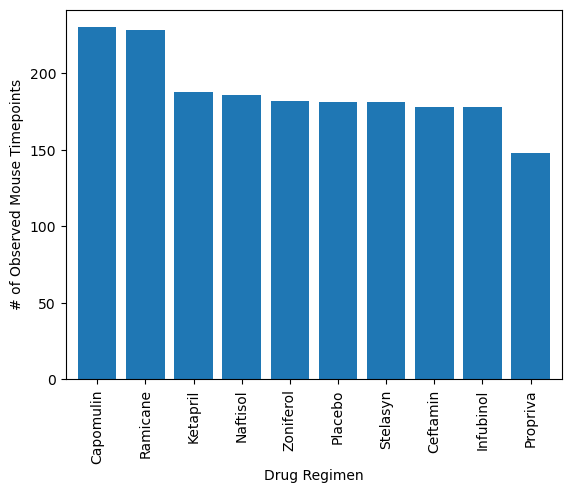

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df = pd.DataFrame(grouped['Drug Regimen'].size())
df = df.rename(columns={df.columns[0]: 'size'})
df = df.sort_values(by='size', ascending=False)

df.plot(kind='bar', legend=False, width=0.8)
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

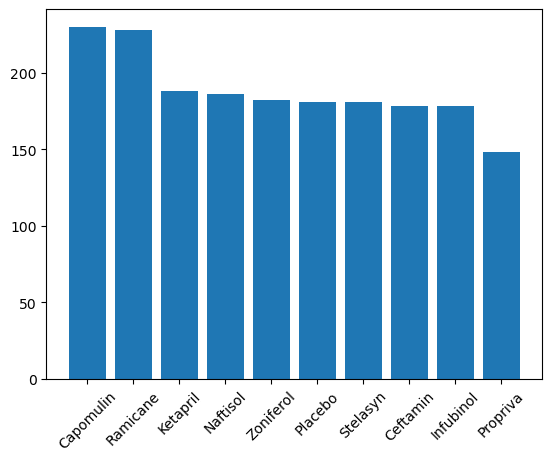

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(df.index, df['size'], width=0.8)
plt.xticks(rotation=45)
plt.show()

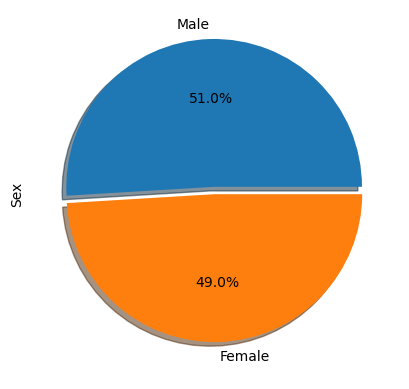

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df = pd.DataFrame(mouse_df['Sex'])
#df = df.rename(columns={df.columns[0]: 'size'})
#df = df.sort_values(by='size', ascending=False)

df = pd.DataFrame(df.value_counts())
df
df.plot(kind="pie", labels = ['Male', 'Female'], ylabel='Sex', legend=False, subplots=True, autopct='%1.1f%%', shadow=True, explode=[0.05, 0])
plt.show()

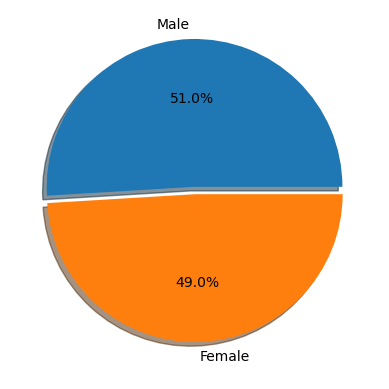

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df['count'], labels=['Male', 'Female'], autopct='%1.1f%%', shadow=True, explode=[0.05, 0])
plt.show()

## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
top_4 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_df = mouse_df.groupby(['Mouse ID'])['Timepoint'].max()
final_tumor_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = mouse_df.merge(final_tumor_df, on=["Mouse ID", "Timepoint"], how="inner")
merged = merged[merged["Drug Regimen"].isin(top_4)]
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
234,x822,Ceftamin,Male,3,29,45,61.386660,3
236,y163,Infubinol,Female,17,27,45,67.685569,3
240,y769,Ceftamin,Female,6,27,45,68.594745,4
241,y865,Ceftamin,Male,23,26,45,64.729837,3


In [ ]:
#for index, row in merged.iterrows():
#     if row['Drug Regimen'] == "Capomulin":
#         tumor_volumes["Capomulin"].append(row['Tumor Volume (mm3)'])
#     elif row['Drug Regimen'] == "Ramicane":
#         tumor_volumes["Ramicane"].append(row['Tumor Volume (mm3)'])
#     elif row['Drug Regimen'] == "Infubinol":
#         tumor_volumes["Infubinol"].append(row['Tumor Volume (mm3)'])
#     else:
#         tumor_volumes["Ceftamin"].append(row['Tumor Volume (mm3)'])

In [137]:
# Put treatments into a list for for loop (and later for plot labels)
top_4 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for count, treatment in enumerate(top_4):
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    tumor_volumes.append(merged[merged['Drug Regimen'] == treatment]['Tumor Volume (mm3)'])

    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes[count].quantile([.25,.5,.75])
    lowerq = quartiles.iloc[0]
    #print(lowerq)
    upperq = quartiles.iloc[2]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(lower_bound)
#     print(upper_bound)
#     print(quartiles)
#     print(tumor_volumes[count][tumor_volumes[count] < lower_bound])
#     print(tumor_volumes[count][tumor_volumes[count] > upper_bound])
#     print(tumor_volumes[count][tumor_volumes[count] < lower_bound])
#     print(tumor_volumes[count][tumor_volumes[count] > upper_bound])
    #if (not tumor_volumes[count][tumor_volumes[count] < lower_bound].empty) or (not tumor_volumes[count][tumor_volumes[count] > upper_bound].empty):
    print(f'Outliers for {treatment} are {np.append(tumor_volumes[count][tumor_volumes[count] < lower_bound].values, tumor_volumes[count][tumor_volumes[count] > upper_bound].values)}')
        #print(tumor_volumes[count][tumor_volumes[count] < lower_bound].values[0])
    #tumor_volumes[count][tumor_volumes[count]['Tumor Volume (mm3)'] < lower_bound]
    #print(f"possible outliers for {treatment} are {outliers}")
#tumor_volumes

Outliers for Capomulin are []
Outliers for Ramicane are []
Outliers for Infubinol are [36.3213458]
Outliers for Ceftamin are []


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
